In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [8]:
#Linear Regression

# Initialize some X,y,w,b

X = np.array([1,3,4])
y = np.array([2,4,8])

print("X=", X, X.shape[0])
print("y=", y, y.shape)

X= [1 3 4] 3
y= [2 4 8] (3,)


In [3]:
#Assuming weight and bias
w = 1.5
b = 1

In [4]:
#Predict y_hat
def predict_y(X,w,b):
	m = X.shape[0]
	y_hat = np.zeros(m)

	for i in range(m):
		y_hat[i] = (w*X[i]) + b
	
	return y_hat

In [9]:
predict_y(X, w, b), y

(array([2.5, 5.5, 7. ]), array([2, 4, 8]))

In [12]:
def plot_true_pred(X,y,w,b):
	y_hat = predict_y(X,w,b)
	plt.figure(figsize=(4,3))
	plt.scatter(X,y,label="y_true")
	plt.plot(X, y_hat, label="y_hat")
	plt.title("y_true vs y_hat")
	plt.legend()

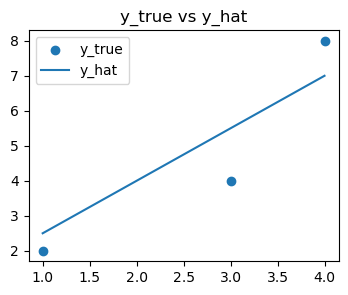

In [13]:
plot_true_pred(X,y,w,b)

In [14]:
#MSE Cost function
y_hat = predict_y(X,w,b)
print(y)
print(y_hat)

[2 4 8]
[2.5 5.5 7. ]


In [15]:
def MSE(y, y_hat):
	data_shape = y.shape[0]
	square_error_sum = 0
	for i in range(data_shape):
		square_error_sum += (y[i]-y_hat[i])**2

	return (square_error_sum/(2*data_shape))  

In [16]:
MSE(y, y_hat)

0.5833333333333334

In [28]:
print("X=",X)
print(type(X))
print("Y=",y)
print(type(y))

X= [1 3 4]
<class 'numpy.ndarray'>
Y= [2 4 8]
<class 'numpy.ndarray'>


In [29]:
#Gradient Descent
def gradient(X,y,w,b):
	m = X.shape[0]

	dj_dw = 0
	dj_db = 0

	for i in range(m):
		error = w*X[i] + b - y[i]
		dj_dw += 2*(error * X[i])
		dj_db += 2*(error)

	dj_dw = dj_dw/m
	dj_db = dj_db/m

	return dj_dw, dj_db


In [31]:
alpha = 0.01

dj_dw, dj_db = gradient(X,y,w,b)

w_new = w - alpha*dj_dw
b_new = b - alpha*dj_db

MSE(y, predict_y(X,w_new,b_new))

0.5792222222222222

In [32]:
print("Cost before gradient descent", MSE(y, predict_y(X,w,b)))
print("Cost after gradient descent", MSE(y, predict_y(X,w_new,b_new)))

Cost before gradient descent 0.5833333333333334
Cost after gradient descent 0.5792222222222222


In [58]:
def gradient_descent(X, y, w, b, iter=2000, alpha = 0.01, history_intervals=100):
	history = {}
	for i in range(iter):
		dj_dw, dj_db = gradient(X,y,w,b)
		w = w - alpha*dj_dw
		b = b - alpha*dj_db
		history[i]=MSE(y, predict_y(X,w,b))

		if i % history_intervals == 0 :
			print(f"Epoch {i} | Cost {history[i]}")

	return w, b, history


In [59]:
w_new, b_new, history = gradient_descent(X, y, w, b)

Epoch 0 | Cost 0.5792222222222222
Epoch 100 | Cost 0.5036330031480194
Epoch 200 | Cost 0.46752883600499623
Epoch 300 | Cost 0.4487905567006474
Epoch 400 | Cost 0.4390652773472457
Epoch 500 | Cost 0.43401779902944004
Epoch 600 | Cost 0.431398127507119
Epoch 700 | Cost 0.43003850227393065
Epoch 800 | Cost 0.4293328486227111
Epoch 900 | Cost 0.4289666101451328
Epoch 1000 | Cost 0.4287765301785274
Epoch 1100 | Cost 0.4286778775357371
Epoch 1200 | Cost 0.4286266762223982
Epoch 1300 | Cost 0.4286001024336637
Epoch 1400 | Cost 0.4285863104779179
Epoch 1500 | Cost 0.42857915237015987
Epoch 1600 | Cost 0.4285754372692985
Epoch 1700 | Cost 0.4285735091096677
Epoch 1800 | Cost 0.4285725083832541
Epoch 1900 | Cost 0.428571989000243


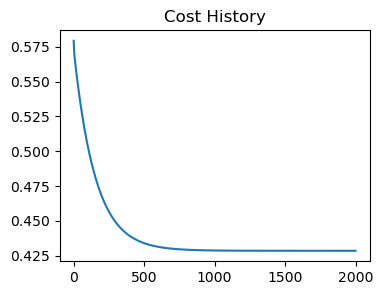

In [60]:
def plot_history(history):
	plt.figure(figsize=(4,3))
	plt.plot(history.keys(), history.values())
	plt.title("Cost History")
	plt.show()

plot_history(history)

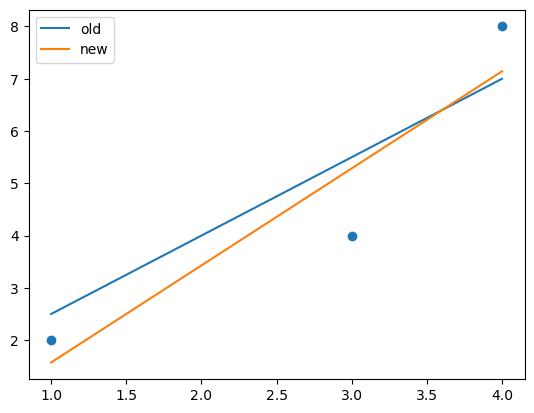

In [61]:
## Model Evaluation
y_hat_old = predict_y(X,w,b)
y_hat_new = predict_y(X,w_new,b_new)

plt.scatter(X, y)
plt.plot(X, y_hat_old, label="old")
plt.plot(X, y_hat_new, label="new")
plt.legend()




In [62]:
#Fitting More data with Linear Regression
m = 20
target_w = 3.3
target_b = -1.2
X = np.random.uniform(-5,5,m)
noise = np.random.uniform(-3,3,m)
y = target_w * X + target_b + noise


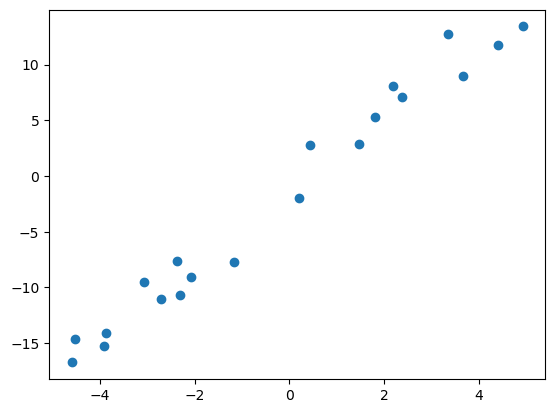

In [63]:
plt.scatter(X,y)

In [64]:
w_init = 0
b_init = 0

w, b, history = gradient_descent(X, y, w_init, b_init)

Epoch 0 | Cost 36.32266954491953
Epoch 100 | Cost 1.3375436316703246
Epoch 200 | Cost 1.3253149327966396
Epoch 300 | Cost 1.3250910397725162
Epoch 400 | Cost 1.325086940555848
Epoch 500 | Cost 1.3250868655040358
Epoch 600 | Cost 1.325086864129926
Epoch 700 | Cost 1.3250868641047675
Epoch 800 | Cost 1.3250868641043063
Epoch 900 | Cost 1.3250868641042985
Epoch 1000 | Cost 1.3250868641042977
Epoch 1100 | Cost 1.3250868641042979
Epoch 1200 | Cost 1.3250868641042985
Epoch 1300 | Cost 1.325086864104298
Epoch 1400 | Cost 1.3250868641042983
Epoch 1500 | Cost 1.3250868641042983
Epoch 1600 | Cost 1.325086864104298
Epoch 1700 | Cost 1.3250868641042985
Epoch 1800 | Cost 1.3250868641042985
Epoch 1900 | Cost 1.3250868641042985


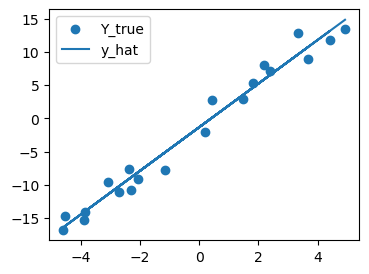

In [67]:
plt.figure(figsize=(4,3))
plt.scatter(X,y, label="Y_true")
plt.plot(X, predict_y(X,w,b), label='y_hat')
plt.legend()

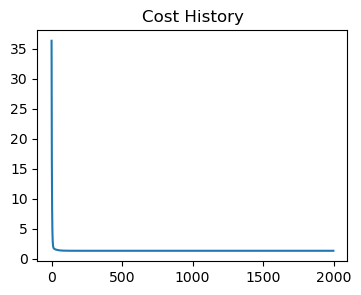

In [69]:
plot_history(history)

In [70]:
w, b

(3.273482276199, -1.3078894447354223)

In [204]:
#Multiple Linear Regression

X = np.array([[1,2], [2,1], [3,1], [1,3]])

y = np.array([3,6,8,7])
print("X=",X.shape)
print("y=",y.shape)

X= (4, 2)
y= (4,)


In [205]:
w = np.array([3,2])
b = -2

In [206]:
#Predict y_hat
def pred_y(X, w, b):
	m = X.shape[0]

	y_hat=np.zeros(m)

	for i in range(m):
		y_hat[i] = np.dot(w, X[i]) + b

	return y_hat

In [207]:
y_hat = pred_y(X, w, b)
print("y_hat=", y_hat)
print("y=", y)

y_hat= [5. 6. 9. 7.]
y= [3 6 8 7]


In [208]:
def true_hat(X, y, w, b):	
	y_hat=pred_y(X, w, b)
	Xpts = np.arange(0,X.shape[0])
	print(Xpts)
	plt.figure(figsize=(4,3))
	plt.scatter(Xpts,y, label="y_true", marker="o", color="g")
	plt.scatter(Xpts,y_hat, label="y_hat", marker="x", color="r")
	plt.title("y_true v/s y_hat")
	plt.xlabel("index")
	plt.ylabel("y_true v/s y_hat")
	plt.legend()

[0 1 2 3]


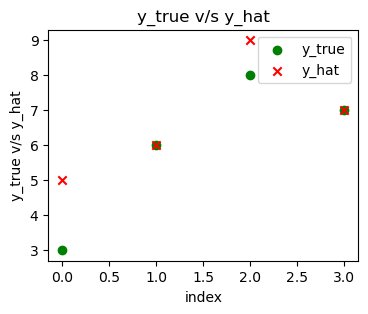

In [209]:
true_hat(X,y,w,b)

In [214]:
# MSE Cost function
def cost(X, w, b, y):
	m = X.shape[0]
	y_hat = pred_y(X, w, b)
	error = np.sum((y_hat-y)**2)

	# error = 0
	# for i in range(m):
	# 	error += (y_hat[i] - y[i])**2

	
	return error/m

In [215]:
cost(X,w,b,y)

1.25

In [216]:
#Gradient Descent
def grad_step(X, y, w, b):
	m = X.shape[0]
	n = X.shape[1]
	
	dj_dw = np.zeros(n)
	dj_db = 0

	for i in range(m):
		error = (np.dot(w, X[i]) + b + y[i])
		# for j in range(n):
		# 	dj_dw[j] += error * X[i, j]
		dj_dw += error * X[i]	# numpy alows this to make it faster
		dj_db += error
	
	dj_dw *= 2/m
	dj_db *= 2/m

	return dj_dw, dj_db

In [220]:
alpha = 0.001

dj_dw, dj_db = grad_step(X, y, w, b)

w_new = w - alpha*dj_dw
b_new = b - alpha*dj_db

print("Cost before gradient descent", cost(X, w,b, y))
print("Cost after gradient descent", cost(X, w_new, b_new, y))

Cost before gradient descent 1.25
Cost after gradient descent 1.0170768749999992


In [238]:
def grad_des(X, y, w, b, iter=1000, alpha=0.001, history_intervals=100):
	history={}
	m = X.shape[0]

	for i in range(iter):
		dj_dw, dj_db = grad_step(X,y,w,b)
		w =w - alpha*dj_dw
		b =b - alpha*dj_db

		# if i%history_intervals == 0:
		Cost = cost(X,w,b,y)
		history[i] = Cost
		if i == 0 or Cost < min(history.values()):
				best_w = w.copy()
				best_b = b
				
		
		print(f"Epoch:{i} Cost:{Cost}")

		# if i==3:
		# 	break
		
		
	return best_w,best_b,history


In [239]:
w_new,b_new,history = grad_des(X,y,w,b)

Epoch:0 Cost:1.0170768749999992
Epoch:1 Cost:0.8566523124341873
Epoch:2 Cost:0.7656932132610521
Epoch:3 Cost:0.7412673522328734
Epoch:4 Cost:0.7805402815719882
Epoch:5 Cost:0.8807723264583632
Epoch:6 Cost:1.0393156696498125
Epoch:7 Cost:1.2536115226337747
Epoch:8 Cost:1.5211873807848661
Epoch:9 Cost:1.8396543600755588
Epoch:10 Cost:2.206704612958311
Epoch:11 Cost:2.6201088211065335
Epoch:12 Cost:3.0777137627686626
Epoch:13 Cost:3.577439952554736
Epoch:14 Cost:4.117279351538022
Epoch:15 Cost:4.695293145615565
Epoch:16 Cost:5.30960959013119
Epoch:17 Cost:5.958421918822244
Epoch:18 Cost:6.639986315207652
Epoch:19 Cost:7.3526199445894145
Epoch:20 Cost:8.09469904489262
Epoch:21 Cost:8.864657074620563
Epoch:22 Cost:9.660982916251601
Epoch:23 Cost:10.482219133452706
Epoch:24 Cost:11.326960280532132
Epoch:25 Cost:12.193851262599104
Epoch:26 Cost:13.081585744943052
Epoch:27 Cost:13.98890461018802
Epoch:28 Cost:14.914594461819934
Epoch:29 Cost:15.857486172724837
Epoch:30 Cost:16.816453477416182


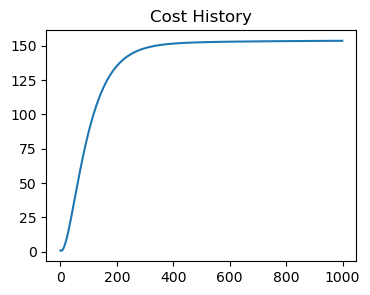

In [240]:
plot_history(history)

[0 1 2 3]


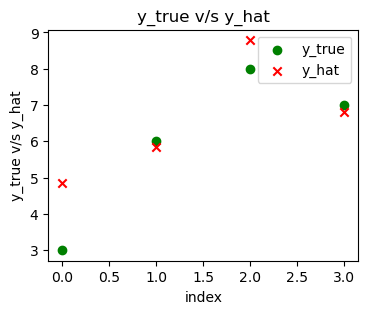

In [ ]:
true_hat(X,y,w_new,b_new)

[0 1 2 3]


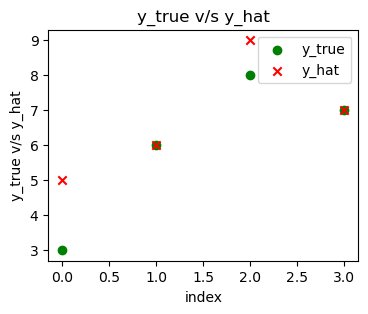

In [242]:
true_hat(X,y,w,b)